In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


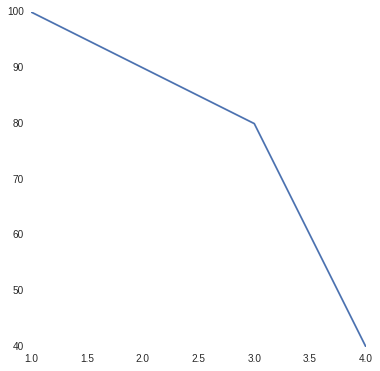

In [16]:
import time
import datetime

import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import pylab
import scipy as sp
import seaborn
plt.rc('figure', figsize=(10,6))

colors = seaborn.color_palette()

from matplotlib import rc

rc("figure", facecolor="white")
rc("axes", facecolor="white")
rc("axes", edgecolor="grey")
rc("grid", alpha=0.9)
rc("grid", linewidth=0.8)
rc("grid", linestyle=":")


x = [1, 2, 3, 4]test_business_data.csv
y = [100, 90, 80, 40]
plt.plot(x, y)
plt.show()


In [126]:
import csv
business_data = pd.read_csv('test_business_data.csv', dtype=unicode)
checkin_data = pd.read_csv('test_checkin_data.csv', delimiter="\t", quoting=csv.QUOTE_NONE, encoding='utf-8')
review_data = pd.read_csv('test_review_data.csv', delimiter="\t",encoding='utf-8')
user_data = pd.read_csv('test_user_data.csv')#,header = None, delimiter="\t", quoting=csv.QUOTE_NONE, encoding='utf-8')

In [127]:
user_data.head()


,yelping_since,compliments.plain,review_count,friends,compliments.cute,compliments.writer,fans,compliments.note,type,compliments.hot,...,compliments.more,elite,name,user_id,votes.cool,compliments.list,votes.funny,compliments.photos,compliments.funny,votes.useful
0,2004-10,25.0,108,"[u'rpOyqD_893cqmDAtJLbdog', u'4U9kSBLuBDU391x6...",15.0,9.0,70,20.0,user,48.0,...,3.0,"[2005, 2006]",Russel,18kPq7GPye-YQ3LyKyAZPw,245,NaN,167,14.0,11.0,280
1,2004-10,959.0,1274,"[u'18kPq7GPye-YQ3LyKyAZPw', u'4U9kSBLuBDU391x6...",206.0,327.0,1179,611.0,user,1094.0,...,134.0,"[2005, 2006, 2007, 2008, 2009, 2010, 2011, 201...",Jeremy,rpOyqD_893cqmDAtJLbdog,11093,38.0,7681,330.0,580.0,14199
2,2004-10,89.0,442,"[u'18kPq7GPye-YQ3LyKyAZPw', u'rpOyqD_893cqmDAt...",23.0,24.0,100,83.0,user,101.0,...,19.0,"[2005, 2006, 2007, 2008, 2009, 2010, 2011, 201...",Michael,4U9kSBLuBDU391x6bxU-YA,732,4.0,908,24.0,120.0,1483
3,2004-10,NaN,11,"[u'18kPq7GPye-YQ3LyKyAZPw', u'rpOyqD_893cqmDAt...",2.0,NaN,2,NaN,user,NaN,...,NaN,[],Ken,fHtTaujcyKvXglE33Z5yIw,5,NaN,1,NaN,NaN,11
4,2004-10,2.0,66,"[u'rpOyqD_893cqmDAtJLbdog', u'HDQixQ-WZEV0LVPJ...",2.0,2.0,4,1.0,user,1.0,...,1.0,[2005],Katherine,SIBCL7HBkrP4llolm4SC2A,13,NaN,11,NaN,NaN,34


In [128]:
review_data.head()

,user_id,review_id,text,votes.cool,business_id,votes.funny,stars,date,type,votes.useful
0,18kPq7GPye-YQ3LyKyAZPw,Ya85v4eqdd6k9Od8HbQjyA,"Mr Hoagie is an institution. Walking in, it do...",0.0,5UmKMjUEUNdYWqANhGckJw,0.0,4.0,2012-08-01,review,0.0
1,rpOyqD_893cqmDAtJLbdog,KPvLNJ21_4wbYNctrOwWdQ,Excellent food. Superb customer service. I mis...,0.0,5UmKMjUEUNdYWqANhGckJw,0.0,5.0,2014-02-13,review,0.0
2,4U9kSBLuBDU391x6bxU-YA,fFSoGV46Yxuwbr3fHNuZig,Yes this place is a little out dated and not o...,0.0,5UmKMjUEUNdYWqANhGckJw,0.0,5.0,2015-10-31,review,0.0
3,fHtTaujcyKvXglE33Z5yIw,Di3exaUCFNw1V4kSNW5pgA,All the food is great here. But the best thing...,0.0,UsFtqoBl7naz8AVUBZMjQQ,0.0,5.0,2013-11-08,review,0.0
4,SIBCL7HBkrP4llolm4SC2A,0Lua2-PbqEQMjD9r89-asw,We checked this place out this past Monday for...,0.0,UsFtqoBl7naz8AVUBZMjQQ,0.0,3.0,2014-03-29,review,0.0


In [129]:
if 'user_id' in list(review_data.columns.values):
    print "uuuuuu"
review_data.columns.values

uuuuuu


array([u'user_id', u'review_id', u'text', u'votes.cool', u'business_id',
       u'votes.funny', u'stars', u'date', u'type', u'votes.useful'], dtype=object)

In [130]:
review_user_data = review_data.merge(user_data,
                                     left_on='user_id',
                                     right_on='user_id',
                                     how='outer',
                                     suffixes=('_review', '_user'))
review_user_data.head()

,user_id,review_id,text,votes.cool_review,business_id,votes.funny_review,stars,date,type_review,votes.useful_review,...,average_stars,compliments.more,elite,name,votes.cool_user,compliments.list,votes.funny_user,compliments.photos,compliments.funny,votes.useful_user
0,18kPq7GPye-YQ3LyKyAZPw,Ya85v4eqdd6k9Od8HbQjyA,"Mr Hoagie is an institution. Walking in, it do...",0.0,5UmKMjUEUNdYWqANhGckJw,0.0,4.0,2012-08-01,review,0.0,...,4.14,3.0,"[2005, 2006]",Russel,245,NaN,167,14.0,11.0,280
1,rpOyqD_893cqmDAtJLbdog,KPvLNJ21_4wbYNctrOwWdQ,Excellent food. Superb customer service. I mis...,0.0,5UmKMjUEUNdYWqANhGckJw,0.0,5.0,2014-02-13,review,0.0,...,3.66,134.0,"[2005, 2006, 2007, 2008, 2009, 2010, 2011, 201...",Jeremy,11093,38.0,7681,330.0,580.0,14199
2,4U9kSBLuBDU391x6bxU-YA,fFSoGV46Yxuwbr3fHNuZig,Yes this place is a little out dated and not o...,0.0,5UmKMjUEUNdYWqANhGckJw,0.0,5.0,2015-10-31,review,0.0,...,3.60,19.0,"[2005, 2006, 2007, 2008, 2009, 2010, 2011, 201...",Michael,732,4.0,908,24.0,120.0,1483
3,fHtTaujcyKvXglE33Z5yIw,Di3exaUCFNw1V4kSNW5pgA,All the food is great here. But the best thing...,0.0,UsFtqoBl7naz8AVUBZMjQQ,0.0,5.0,2013-11-08,review,0.0,...,4.64,NaN,[],Ken,5,NaN,1,NaN,NaN,11
4,SIBCL7HBkrP4llolm4SC2A,0Lua2-PbqEQMjD9r89-asw,We checked this place out this past Monday for...,0.0,UsFtqoBl7naz8AVUBZMjQQ,0.0,3.0,2014-03-29,review,0.0,...,3.80,1.0,[2005],Katherine,13,NaN,11,NaN,NaN,34


In [131]:
bbusiness_data = pd.read_csv('test_business_data.csv', dtype=unicode)
bbusiness_data.head()

,attributes.Ambience.divey,attributes.Happy Hour,attributes.Ambience.trendy,attributes.Delivery,attributes.Smoking,hours.Wednesday.close,attributes.Wi-Fi,open,city,attributes.Ambience.casual,...,attributes.Noise Level,hours.Sunday.open,attributes.Attire,attributes.Good For.dessert,attributes.Good For Groups,neighborhoods,attributes.Music.dj,attributes.Ambience.romantic,attributes.Takes Reservations,attributes.Ambience.upscale
0,False,NaN,False,False,NaN,21:00,NaN,True,Dravosburg,False,...,average,NaN,casual,False,True,[],NaN,False,False,False
1,NaN,True,NaN,NaN,NaN,NaN,NaN,True,Dravosburg,NaN,...,NaN,NaN,NaN,NaN,True,[],NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,Dravosburg,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,Bethel Park,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,21:00,NaN,True,Pittsburgh,NaN,...,NaN,11:00,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


In [132]:
if 'business_id' in list(business_data.columns.values):
    print "uuuuuu"
business_data.columns.values

uuuuuu


array(['attributes.Ambience.divey', 'attributes.Happy Hour',
       'attributes.Ambience.trendy', 'attributes.Delivery',
       'attributes.Smoking', 'hours.Wednesday.close', 'attributes.Wi-Fi',
       'open', 'city', 'attributes.Ambience.casual', 'hours.Friday.open',
       'stars', 'attributes.Good For.latenight',
       'attributes.Outdoor Seating', 'type', 'attributes.Alcohol',
       'attributes.Caters', 'attributes.Ambience.intimate',
       'attributes.Parking.lot', 'business_id',
       'attributes.Ambience.touristy', 'latitude', 'hours.Tuesday.open',
       'attributes.Good For.brunch', 'categories', 'name',
       'attributes.Price Range', 'hours.Monday.open',
       'attributes.Waiter Service', 'attributes.Coat Check',
       'attributes.Parking.street', 'longitude',
       'attributes.Ambience.hipster', 'hours.Tuesday.close',
       'attributes.Ambience.classy', 'hours.Saturday.close',
       'hours.Saturday.open', 'attributes.Good For.dinner',
       'attributes.Good For.b

In [133]:
business_review_user_data = review_user_data.merge(business_data,
                                                   left_on='business_id',
                                                   right_on='business_id',
                                                   how='outer',
                                                   suffixes=('_reviewuser', '_business'))

In [134]:
business_review_user_data.head()

,user_id,review_id,text,votes.cool_review,business_id,votes.funny_review,stars_reviewuser,date,type_review,votes.useful_review,...,attributes.Noise Level,hours.Sunday.open,attributes.Attire,attributes.Good For.dessert,attributes.Good For Groups,neighborhoods,attributes.Music.dj,attributes.Ambience.romantic,attributes.Takes Reservations,attributes.Ambience.upscale
0,18kPq7GPye-YQ3LyKyAZPw,Ya85v4eqdd6k9Od8HbQjyA,"Mr Hoagie is an institution. Walking in, it do...",0.0,5UmKMjUEUNdYWqANhGckJw,0.0,4.0,2012-08-01,review,0.0,...,average,NaN,casual,False,True,[],NaN,False,False,False
1,rpOyqD_893cqmDAtJLbdog,KPvLNJ21_4wbYNctrOwWdQ,Excellent food. Superb customer service. I mis...,0.0,5UmKMjUEUNdYWqANhGckJw,0.0,5.0,2014-02-13,review,0.0,...,average,NaN,casual,False,True,[],NaN,False,False,False
2,4U9kSBLuBDU391x6bxU-YA,fFSoGV46Yxuwbr3fHNuZig,Yes this place is a little out dated and not o...,0.0,5UmKMjUEUNdYWqANhGckJw,0.0,5.0,2015-10-31,review,0.0,...,average,NaN,casual,False,True,[],NaN,False,False,False
3,fHtTaujcyKvXglE33Z5yIw,Di3exaUCFNw1V4kSNW5pgA,All the food is great here. But the best thing...,0.0,UsFtqoBl7naz8AVUBZMjQQ,0.0,5.0,2013-11-08,review,0.0,...,NaN,NaN,NaN,NaN,True,[],NaN,NaN,NaN,NaN
4,SIBCL7HBkrP4llolm4SC2A,0Lua2-PbqEQMjD9r89-asw,We checked this place out this past Monday for...,0.0,UsFtqoBl7naz8AVUBZMjQQ,0.0,3.0,2014-03-29,review,0.0,...,NaN,NaN,NaN,NaN,True,[],NaN,NaN,NaN,NaN


In [135]:
business_review_user_data = business_review_user_data.rename(columns = {'name_reviewuser':'name_user',
                                                                        'review_count_reviewuser':'review_count_user',
                                                                        'stars_reviewuser':'stars_review'})

In [136]:
business_review_user_data.filter(regex="[Kk]ids").dropna(how='all').head()

,attributes.Good for Kids
0,True
1,True
2,True
10,True
12,True


In [138]:
cols = business_review_user_data.columns
cols


Index([                        u'user_id',                       u'review_id',
                                  u'text',               u'votes.cool_review',
                           u'business_id',              u'votes.funny_review',
                          u'stars_review',                            u'date',
                           u'type_review',             u'votes.useful_review',
                         u'yelping_since',               u'compliments.plain',
                     u'review_count_user',                         u'friends',
                      u'compliments.cute',              u'compliments.writer',
                                  u'fans',                u'compliments.note',
                             u'type_user',                 u'compliments.hot',
                      u'compliments.cool',             u'compliments.profile',
                         u'average_stars',                u'compliments.more',
                                 u'elite',          

In [139]:
cols = cols.map(lambda x: x.replace(' ', '_').lower() if isinstance(x, (str, unicode)) else x)
business_review_user_data.columns = cols
cols

array([u'user_id', u'review_id', u'text', u'votes.cool_review',
       u'business_id', u'votes.funny_review', 'stars_review', u'date',
       u'type_review', u'votes.useful_review', 'yelping_since',
       'compliments.plain', 'review_count_user', 'friends',
       'compliments.cute', 'compliments.writer', 'fans',
       'compliments.note', 'type_user', 'compliments.hot',
       'compliments.cool', 'compliments.profile', 'average_stars',
       'compliments.more', 'elite', 'name_user', 'votes.cool_user',
       'compliments.list', 'votes.funny_user', 'compliments.photos',
       'compliments.funny', 'votes.useful_user',
       'attributes.ambience.divey', 'attributes.happy_hour',
       'attributes.ambience.trendy', 'attributes.delivery',
       'attributes.smoking', 'hours.wednesday.close', 'attributes.wi-fi',
       'open', 'city', 'attributes.ambience.casual', 'hours.friday.open',
       'stars_business', 'attributes.good_for.latenight',
       'attributes.outdoor_seating', 'type', 

In [140]:
firstFewRows = business_review_user_data.ix[:,['categories','text','stars_review']].head(100000)
firstFewRows

,categories,text,stars_review
0,"[u'Fast Food', u'Restaurants']","Mr Hoagie is an institution. Walking in, it do...",4.0
1,"[u'Fast Food', u'Restaurants']",Excellent food. Superb customer service. I mis...,5.0
2,"[u'Fast Food', u'Restaurants']",Yes this place is a little out dated and not o...,5.0
3,[u'Nightlife'],All the food is great here. But the best thing...,5.0
4,[u'Nightlife'],We checked this place out this past Monday for...,3.0
5,[u'Nightlife'],Wing sauce is like water. Pretty much a lot of...,1.0
6,[u'Nightlife'],All the food is great here. But the best thing...,5.0
7,[u'Nightlife'],We checked this place out this past Monday for...,3.0
8,NaN,Cold cheap beer. Good bar food. Good service. ...,NaN
9,"[u'Auto Repair', u'Automotive']",NaN,NaN


In [143]:
firstFewRowsList = firstFewRows['categories'].tolist()
firstFewRowsList

["[u'Fast Food', u'Restaurants']",
 "[u'Fast Food', u'Restaurants']",
 "[u'Fast Food', u'Restaurants']",
 "[u'Nightlife']",
 "[u'Nightlife']",
 "[u'Nightlife']",
 "[u'Nightlife']",
 "[u'Nightlife']",
 nan,
 "[u'Auto Repair', u'Automotive']",
 "[u'Active Life', u'Mini Golf', u'Golf']",
 "[u'Shopping', u'Home Services', u'Internet Service Providers', u'Mobile Phones', u'Professional Services', u'Electronics']",
 "[u'Bars', u'American (New)', u'Nightlife', u'Lounges', u'Restaurants']",
 "[u'Active Life', u'Trainers', u'Fitness & Instruction']",
 "[u'Bars', u'American (Traditional)', u'Nightlife', u'Restaurants']",
 "[u'Auto Repair', u'Automotive', u'Tires']",
 "[u'Active Life', u'Mini Golf']"]

In [145]:
restaurantsDF = firstFewRows[firstFewRows['categories'].str.contains('Restaurants', na=False)]


In [146]:
business_review_user_data.ix[:, ["date",
                                 "name_user",
                                 "stars_business",
                                 "attributes.takes_reservations",
                                 "stars_review",
                                 "hours.monday.open",
                                 "name_business",
                                 "categories",
                                 "latitude",
                                 "longitude",
                                 "city",
                                 "votes.cool_user",
                                 "votes.funny_user",
                                 "votes.useful_user",
                                 "text",
                                 "votes.cool_review",
                                 "votes.funny_review",
                                 "votes.useful_review",
                                 "review_count_business"]].head()

,date,name_user,stars_business,attributes.takes_reservations,stars_review,hours.monday.open,name_business,categories,latitude,longitude,city,votes.cool_user,votes.funny_user,votes.useful_user,text,votes.cool_review,votes.funny_review,votes.useful_review,review_count_business
0,2012-08-01,Russel,4.5,False,4.0,11:00,Mr Hoagie,"[u'Fast Food', u'Restaurants']",40.3543266,-79.9007057,Dravosburg,245.0,167.0,280.0,"Mr Hoagie is an institution. Walking in, it do...",0.0,0.0,0.0,4
1,2014-02-13,Jeremy,4.5,False,5.0,11:00,Mr Hoagie,"[u'Fast Food', u'Restaurants']",40.3543266,-79.9007057,Dravosburg,11093.0,7681.0,14199.0,Excellent food. Superb customer service. I mis...,0.0,0.0,0.0,4
2,2015-10-31,Michael,4.5,False,5.0,11:00,Mr Hoagie,"[u'Fast Food', u'Restaurants']",40.3543266,-79.9007057,Dravosburg,732.0,908.0,1483.0,Yes this place is a little out dated and not o...,0.0,0.0,0.0,4
3,2013-11-08,Ken,3.5,NaN,5.0,NaN,Clancy's Pub,[u'Nightlife'],40.3505527,-79.8868138,Dravosburg,5.0,1.0,11.0,All the food is great here. But the best thing...,0.0,0.0,0.0,4
4,2014-03-29,Katherine,3.5,NaN,3.0,NaN,Clancy's Pub,[u'Nightlife'],40.3505527,-79.8868138,Dravosburg,13.0,11.0,34.0,We checked this place out this past Monday for...,0.0,0.0,0.0,4


In [147]:
for column in business_review_user_data.columns:
    if 'attributes' in column:
        print '%55s'%column, '\t',business_review_user_data[column].unique()

                              attributes.ambience.divey 	['False' nan]
                                  attributes.happy_hour 	[nan 'True' 'False']
                             attributes.ambience.trendy 	['False' nan]
                                    attributes.delivery 	['False' nan]
                                     attributes.smoking 	[nan 'no' 'outdoor']
                                       attributes.wi-fi 	[nan 'no' 'free']
                             attributes.ambience.casual 	['False' nan 'True']
                          attributes.good_for.latenight 	['False' nan]
                             attributes.outdoor_seating 	['False' nan 'True']
                                     attributes.alcohol 	['none' nan 'full_bar']
                                      attributes.caters 	['False' nan 'True']
                           attributes.ambience.intimate 	['False' nan]
                                 attributes.parking.lot 	['False' nan 'True']
                     

In [151]:
def plotStarsHistogram(colName):
    fullDF = business_review_user_data.ix[:,[colName,'stars_review']].head(100000)
    trueDF = fullDF[fullDF[colName].isin(['True'])]
    falseDF = fullDF[fullDF[colName].isin(['False'])]
    fig, ax = plt.subplots()
    ax.set_title(colName)
    ax.set_xlabel('Rating in Stars')
    ax.set_ylabel('Normalized Frequency')
    bins = 5
    n, bins, patches = ax.hist([trueDF['stars_review'],falseDF['stars_review']], bins, histtype='bar',  color=['blue','green'], 
                                label=['True','False'],rwidth=0.3)
    leg = ax.legend(loc='upper left')
    plt.show()


AttributeError: max must be larger than min in range parameter.

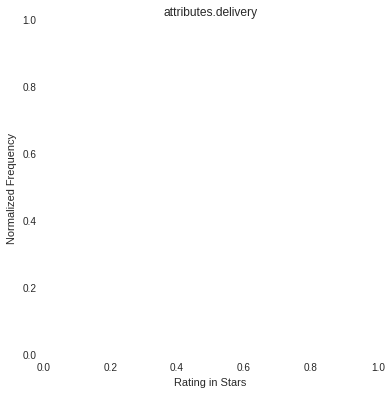

In [178]:
colName = 'attributes.delivery'
fullDF = business_review_user_data.ix[:,[colName,'stars_review']].head(100000)
trueDF = fullDF[fullDF[colName].isin(['True'])]
falseDF = fullDF[fullDF[colName].isin(['False'])]
fig, ax = plt.subplots()
# plt.axis([0, 6, 0, 20])
ax.set_title(colName)
ax.set_xlabel('Rating in Stars')
ax.set_ylabel('Normalized Frequency')
bins = 5
#[trueDF['stars_review'],falseDF['stars_review']]
n, bins, patches = ax.hist( [trueDF['stars_review'],falseDF['stars_review']], bins,normed=True, histtype='bar', fc='k', color=['blue','green'], label=['True','False'],rwidth=0.3,dropna=True, alpha=0.9)


In [179]:
def calculateCorrelation(colName):
    fullDF = business_review_user_data.ix[:,[colName,'stars_review']].head(100000)
    trueDF = fullDF[fullDF[colName].isin(['True'])]
    falseDF = fullDF[fullDF[colName].isin(['False'])]
    positiveRating = 4
    trueHigh = len(trueDF[trueDF['stars_review'] >= positiveRating])
    trueLow = len(trueDF[trueDF['stars_review'] < positiveRating])
    falseHigh = len(falseDF[falseDF['stars_review'] >= positiveRating])
    falseLow = len(falseDF[falseDF['stars_review'] < positiveRating])
    #print (trueHigh+falseLow)
    totalSamples = trueHigh+trueLow+falseHigh+falseLow
    print "Statistics for Column",colName
    print "Total number of Samples are", totalSamples
    print "Total number of True-High Samples are", trueHigh
    print "Total number of True-Low Samples are", trueLow
    print "Total number of False-High Samples are", falseHigh
    print "Total number of False-Low Samples are", falseLow
    print "Percentage correlation between:",colName,"and review stars is",100*(trueHigh+falseLow)/totalSamples,"%"
    print "-------------------------------------------------------"

In [180]:
for column in business_review_user_data.columns:
    if 'attributes' in column and 'True' in business_review_user_data[column].unique():
        calculateCorrelation(column)

Statistics for Column attributes.happy_hour
Total number of Samples are 5
Total number of True-High Samples are 2
Total number of True-Low Samples are 3
Total number of False-High Samples are 0
Total number of False-Low Samples are 0
Percentage correlation between: attributes.happy_hour and review stars is 40 %
-------------------------------------------------------
Statistics for Column attributes.ambience.casual
Total number of Samples are 3
Total number of True-High Samples are 0
Total number of True-Low Samples are 0
Total number of False-High Samples are 3
Total number of False-Low Samples are 0
Percentage correlation between: attributes.ambience.casual and review stars is 0 %
-------------------------------------------------------
Statistics for Column attributes.outdoor_seating
Total number of Samples are 8
Total number of True-High Samples are 0
Total number of True-Low Samples are 0
Total number of False-High Samples are 5
Total number of False-Low Samples are 3
Percentage cor

ZeroDivisionError: integer division or modulo by zero

AttributeError: max must be larger than min in range parameter.

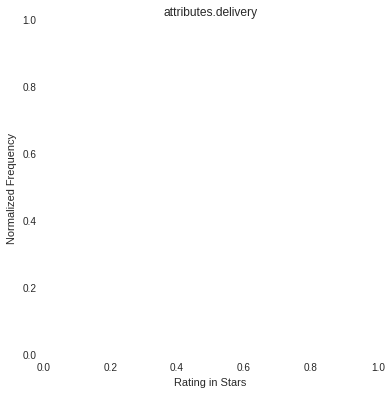

In [160]:
plotStarsHistogram('attributes.delivery')